Wczytujemy moduły potrzebne na dzisiejsze zajęcia


In [6]:
import pandas as pd
import numpy as np
import os ## funkcja listdir
import glob ## glob

Wczytujemy dane na potrzeby zajęć - sprawdzamy ścieżki z modułem `os`



In [4]:
os.listdir()

['.config', 'wyn_2016.xlsx', 'wyn_2018.xlsx', 'sample_data']

In [13]:
os.getcwd() 

'/content'

In [16]:
os.getcwd()  + "/" + os.listdir()[1]

'/content/wyn_2016.xlsx'

Znamy ścieżki to wczytujemy dane z 2016 i 2018 roku


In [17]:
dane2016 = pd.read_excel(io = "/content/wyn_2016.xlsx", sheet_name = 1)
dane2018 = pd.read_excel(io = "/content/wyn_2018.xlsx", sheet_name = 1)
dane2018.head()

,Kod,Nazwa,Wyszczególnienie,Rok,Wartosc,Jednostka miary,Atrybut
0,201000,Powiat bolesławiecki,ogółem,2018,4214.66,zł,
1,202000,Powiat dzierżoniowski,ogółem,2018,4024.94,zł,
2,203000,Powiat głogowski,ogółem,2018,4077.69,zł,
3,204000,Powiat górowski,ogółem,2018,3815.89,zł,
4,205000,Powiat jaworski,ogółem,2018,4029.64,zł,


In [ ]:
pow2016=dane2016[["Kod", "Nazwa", "Wartosc"]]
pow2018=dane2018[["Kod", "Wartosc"]]
pow2016.rename(columns = {"Wartosc": "Wartosc2016"}, inplace = True)
pow2018.rename(columns = {"Wartosc": "Wartosc2018"}, inplace = True)
pow2016["Kod"]=pow2016.Kod.astype(str).str.pad(width=7,side="left", fillchar="0")
pow2018["Kod"]=pow2018.Kod.astype(str).str.pad(width=7,side="left", fillchar="0")

In [22]:
pow2018.head()

,Kod,Wartosc2018
0,0201000,4214.66
1,0202000,4024.94
2,0203000,4077.69
3,0204000,3815.89
4,0205000,4029.64


In [27]:
print(pow2016.shape)
print(pow2018.shape)

(380, 3)
(380, 2)


Aby w pythonie połączyć dwie bazy danych należy zastosować funkcję `pd.merge()`, która ma następujące argumenty:

+ `left` -- zbiór danych z lewej strony
+ `right` -- zbiór danych z prawej strony
+ `how` -- jak łączymy dane (`inner`, `left`, `right`, `anti`)
+ `on` -- klucze połączeniowe ale stosujemy wyłącznie gdy mamy te same nazwy w obydwu bazach danych
+ `left_on` i `right_on` -- gdy nie mamy tych samych nazw


In [28]:
wynik = pd.merge(left = pow2016, right = pow2018, how = "inner", on = "Kod")
print(wynik.shape)
wynik.head()

(380, 4)


,Kod,Nazwa,Wartosc2016,Wartosc2018
0,0201000,Powiat bolesławiecki,3666.19,4214.66
1,0202000,Powiat dzierżoniowski,3562.63,4024.94
2,0203000,Powiat głogowski,3723.59,4077.69
3,0204000,Powiat górowski,3386.93,3815.89
4,0205000,Powiat jaworski,3546.24,4029.64


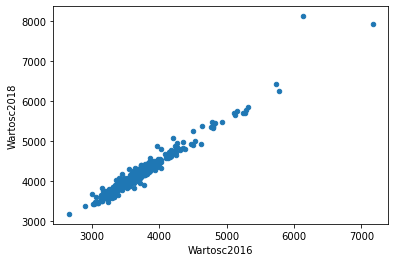

In [29]:
wynik.plot.scatter(x = "Wartosc2016", y = "Wartosc2018")

In [34]:
## tworzymy wskaźnik pokazujacy jak procentowo zmieniły się wynagrodzenie
wynik["wskaznik"] = wynik.Wartosc2018 / wynik.Wartosc2016
wynik.sort_values(by = "wskaznik", ascending = False, inplace = True)

In [35]:
wynik.head()

,Kod,Nazwa,Wartosc2016,Wartosc2018,wskaznik
276,2467000,Powiat m.Jastrzębie-Zdrój,6131.62,8121.08,1.324459
22,0223000,Powiat wrocławski,3964.54,4880.00,1.230912
328,3005000,Powiat grodziski,3006.21,3687.82,1.226734
83,0807000,Powiat sulęciński,3161.56,3829.00,1.211111
299,2611000,Powiat starachowicki,3444.11,4170.22,1.210827


Wczytujemy dane o nieruchomościach za 2018 rok


In [39]:
nieruch=pd.read_excel(io = "/content/rynek_nieruchomosci_2018.xlsx", sheet_name=1)
nieruch.rename(columns = {"Transakcje rynkowe": "rynek", "Wartosc":"cena2018"}, inplace = True)
nieruch_sub=nieruch[["Kod", "rynek", "cena2018"]]
nieruch_sub["Kod"]=nieruch_sub.Kod.astype(str).str.pad(width=7,side="left", fillchar="0")
nieruch_sub.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Kod,rynek,cena2018
0,0201000,rynek pierwotny,3442
1,0201000,rynek wtórny,2341
2,0202000,rynek pierwotny,2650
3,0202000,rynek wtórny,2148
4,0203000,rynek pierwotny,4150


In [46]:
nieruch_sub.rynek.value_counts()

rynek wtórny       377
rynek pierwotny    377
Name: rynek, dtype: int64

In [48]:
# wybieramy podzbiór wierszy:
## & -- koniunkcja, | - alternatywa
## rynek == "rynek pierwotny"
## cena2018 > 0 

ryn_pierw = nieruch_sub[(nieruch_sub.rynek=="rynek pierwotny") & (nieruch_sub.cena2018 > 0)] 
print(ryn_pierw.shape)
ryn_pierw.head()

(215, 3)


,Kod,rynek,cena2018
0,0201000,rynek pierwotny,3442
2,0202000,rynek pierwotny,2650
4,0203000,rynek pierwotny,4150
10,0206000,rynek pierwotny,9664
14,0208000,rynek pierwotny,11401


1. Chcemy sprawdzić ile m2 możemy kupić za średnie miesięczne wyngrodzenie  -- tylko dla powiatów, które występują w obydwu zbiorach danych

2. Chcemy sprawdzić w jakich powiatach nie zanotowano transakcji na rynku pierwotnym (do 40m2) w 2018 roku

3. Zbudować bazę danych, w której będą wszystkie powiaty z 2016 i 2018 oraz informacje o cenie m2


In [57]:
### ad1
wynik_rynek = pd.merge(left = wynik, right = ryn_pierw, how = "inner", on = "Kod")
wynik_rynek["ile_metrow"] = wynik_rynek.Wartosc2018/wynik_rynek.cena2018
wynik_rynek.sort_values(by = "ile_metrow", inplace=True, ascending=False)
wynik_rynek[wynik_rynek.Nazwa == "Powiat m.Poznań"] ## dla poznania
wynik_rynek

,Kod,Nazwa,Wartosc2016,Wartosc2018,wskaznik,rynek,cena2018,ile_metrow
208,1001000,Powiat bełchatowski,5778.97,6259.40,1.083134,rynek pierwotny,2680,2.335597
69,0265000,Powiat m.Wałbrzych od 2013,4180.67,4768.01,1.140489,rynek pierwotny,2475,1.926469
194,2468000,Powiat m.Jaworzno,5314.60,5848.34,1.100429,rynek pierwotny,3107,1.882311
187,0211000,Powiat lubiński,7170.21,7915.01,1.103874,rynek pierwotny,4354,1.817871
211,2462000,Powiat m.Bytom,4024.91,4322.58,1.073957,rynek pierwotny,2501,1.728341
...,...,...,...,...,...,...,...,...
85,0206000,Powiat jeleniogórski,3548.55,4035.56,1.137242,rynek pierwotny,9664,0.417587
91,1210000,Powiat nowosądecki,3240.29,3681.50,1.136164,rynek pierwotny,9769,0.376855
192,3209000,Powiat koszaliński,3558.15,3919.20,1.101471,rynek pierwotny,10423,0.376015
45,0208000,Powiat kłodzki,3526.67,4054.23,1.149592,rynek pierwotny,11401,0.355603


In [68]:
## ad3 i ad2 -- left join i wywalić te rekordy dla których jest brak danych (NaN albo Null)
wynik_rynek_brak = pd.merge(left = wynik, right = ryn_pierw, how = "left", on = "Kod")
wynik_rynek_brak[wynik_rynek_brak.rynek.isna()]

,Kod,Nazwa,Wartosc2016,Wartosc2018,wskaznik,rynek,cena2018
0,2467000,Powiat m.Jastrzębie-Zdrój,6131.62,8121.08,1.324459,NaN,NaN
3,0807000,Powiat sulęciński,3161.56,3829.00,1.211111,NaN,NaN
4,2611000,Powiat starachowicki,3444.11,4170.22,1.210827,NaN,NaN
5,0222000,Powiat wołowski,4202.10,5086.07,1.210364,NaN,NaN
6,2407000,Powiat lubliniecki,3558.10,4296.91,1.207642,NaN,NaN
...,...,...,...,...,...,...,...
368,0221000,Powiat wałbrzyski,3528.00,3825.44,1.084308,NaN,NaN
369,2612000,Powiat staszowski,3939.91,4271.73,1.084220,NaN,NaN
373,0619000,Powiat włodawski,3389.98,3658.82,1.079304,NaN,NaN
375,0620000,Powiat zamojski,3243.03,3474.14,1.071264,NaN,NaN
